Successive over-relaxation (SOR) El método de sobre relajación sucesiva se basa en los métodos de Jacobi y Gauss-Seidel, pero incluye un parámetro de escala que reduce el error de aproximación en el paso (k). La formula iterativa está dada por:
$$x_i ^{(k)} = (1- \omega)x_i^{(k-1)} + \frac{\omega}{a_{ii}} \left[ b_i-\sum_{j=1}^{i-1} a_{ij}x_j^{(k)} - \sum_{j=i+1}^{n} a_{ij}x_j^{(k-1)} \right] $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Relajacion_sucesiva(A, b, omega, x0, tolerancia):
    step = 0
    phi = x0.copy()
    residuo = 1
    while residuo > tolerancia:
        
        for i in range(A.shape[0]):
            sigma = 0
            pn0=phi.copy()
            for j in range(A.shape[1]):
                if j != i:
                    sigma += A[i, j] * phi[j]
                    
            phi[i] = (1 - omega) * phi[i] + (omega / A[i, i]) * (b[i] - sigma)
        residuo = np.abs((phi[j]-pn0[j])/phi[j])
        step += 1
              
    return phi,step

In [3]:
crit_convergencia = 1e-8
omega = 1

In [4]:
A = np.array([[3,-1,-1],[-1.,3.,1.],[2,1,4]])
b = np.array([1.,3.,7.])

In [5]:
vector_init = np.zeros(b.shape[0])

In [6]:
solucion=Relajacion_sucesiva(A,b,omega,vector_init,crit_convergencia)

In [7]:
w_=np.linspace(1,2,50)
steps=np.zeros([len(w_)])
for it in range(len(w_)):
    steps[it]=Relajacion_sucesiva(A,b,w_[it],vector_init,crit_convergencia)[1]
    
print("La Solucion del sistema es:",solucion[0])

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_10048\3116793257.py:15: RuntimeWarning: overflow encountered in double_scalars
  residuo = np.abs((phi[j]-pn0[j])/phi[j])
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_10048\3116793257.py:12: RuntimeWarning: overflow encountered in double_scalars
  sigma += A[i, j] * phi[j]
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_10048\3116793257.py:15: RuntimeWarning: invalid value encountered in double_scalars
  residuo = np.abs((phi[j]-pn0[j])/phi[j])


La Solucion del sistema es: [1. 1. 1.]


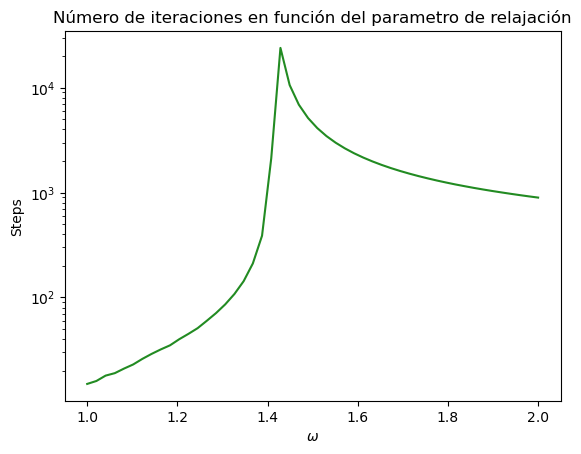

In [12]:
plt.plot(w_,steps, color="forestgreen")
plt.title("Número de iteraciones en función del parametro de relajación")
plt.xlabel("$\omega$")
plt.ylabel("Steps")
plt.yscale("log")

El metodo converge en el menor numero de iteraciones para omega=1, y empieza a diverger despues de 1,4<omega<1,5